# Diabetes Prediction

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Data Extraction

In [2]:
diabetes = pd.read_csv('diabetes.csv')
df = pd.DataFrame(diabetes)

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1

In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## K-Nearest Neighbours Model

In [7]:
#take target data
scaler = StandardScaler()
scaler.fit(df.drop('Outcome', axis = 1))
scaled_feature = scaler.transform(df.drop('Outcome', axis = 1))
feature = pd.DataFrame(scaled_feature, columns = df.columns[:-1])
feature.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   Pedigree       Age  
0  0.468492  1.425995  
1 -0.365061 -0.190672  
2  0.604397 -0.105584  
3 -0.920763 -1.041549  
4  5.484909 -0.020496

In [8]:
#split data
X_train, X_test, y_train, y_test = train_test_split(
      scaled_feature, df['Outcome'], test_size = 0.4, random_state=3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(460, 8)
(460,)
(308, 8)
(308,)


In [9]:
#generate model
knc = KNeighborsClassifier(n_neighbors = 1)
knc.fit(X_train, y_train)
pred = knc.predict(X_test)

print(X_test)
print(pred)

[[-8.44885053e-01 -6.22642036e-01 -9.87709745e-01 ... -9.89028135e-01
   1.63459991e-01 -6.16110671e-01]
 [ 4.60143347e-02  1.09870096e+00  3.04734002e-01 ...  2.06972568e+00
  -7.06334188e-01 -1.05584152e-01]
 [-8.44885053e-01 -7.47830617e-01 -1.60545747e-01 ... -1.11594738e+00
   4.56753625e-02 -9.56461683e-01]
 ...
 [ 2.12477957e+00  5.35352341e-01  2.53036252e-01 ...  5.21310885e-01
   2.57083670e-01  1.42599540e+00]
 [-8.44885053e-01 -3.78365371e+00 -5.71502470e-02 ...  9.41978774e-04
  -2.50296268e-01 -9.56461683e-01]
 [-8.44885053e-01 -1.49896210e+00 -9.87709745e-01 ... -1.14133123e+00
  -6.76133001e-01 -1.04154944e+00]]
[0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1

In [10]:
#prediction
pred = knc.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(pred)
print(accuracy)

[0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0]
0.6655844155844156


In [11]:
#confusion matrix
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[142  41]
 [ 62  63]]


              precision    recall  f1-score   support

           0       0.70      0.78      0.73       183
           1       0.61      0.50      0.55       125

    accuracy                           0.67       308
   macro avg       0.65      0.64      0.64       308
weighted avg       0.66      0.67      0.66       308



Text(0, 0.5, 'Error Rate')

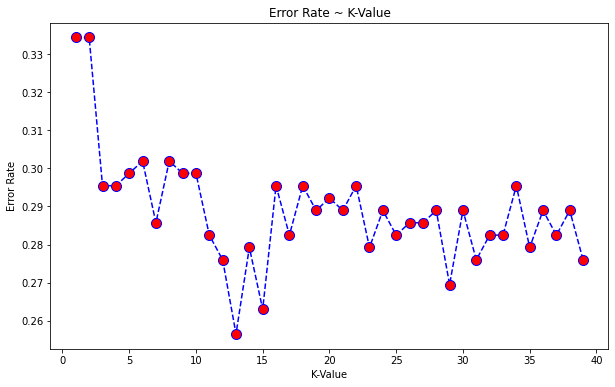

In [12]:
#find good K-value
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate ~ K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [13]:
#training & testing data accuracy
neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
print(train_accuracy)
print(test_accuracy)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39.]
[4.94065646e-324 4.94065646e-324 9.05267586e-312 1.97626258e-323
 4.94065646e-324 9.05267586e-312 3.45845952e-323 4.94065646e-324
 9.05267586e-312 4.94065646e-323 4.94065646e-324 9.05267587e-312
 6.42285340e-323 4.94065646e-324 9.05267585e-312 7.90505033e-323
 4.94065646e-324 9.05267586e-312 9.38724727e-323 4.94065646e-324
 9.05267585e-312 1.08694442e-322 4.94065646e-324 9.05267586e-312
 1.23516411e-322 9.03970207e-312 9.05267586e-312 1.28457068e-322
 9.03970207e-312 9.05267586e-312 1.38338381e-322 9.88131292e-324
 9.05267586e-312 1.43279037e-322 9.03970207e-312 9.05267587e-312
 1.58101007e-322 9.88131292e-324 9.05267586e-312]


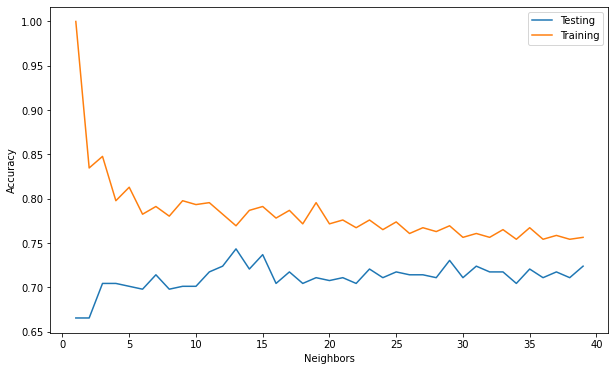

In [14]:
#plotting training & testing
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.figure(figsize=(10,6))
plt.plot(neighbors, test_accuracy, label = 'Testing')
plt.plot(neighbors, train_accuracy, label = 'Training')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
#compare K-value
knc = KNeighborsClassifier(n_neighbors = 5)
  
knc.fit(X_train, y_train)
pred = knc.predict(X_test)
  
print('K = 5')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

knc = KNeighborsClassifier(n_neighbors = 10)
  
knc.fit(X_train, y_train)
pred = knc.predict(X_test)
  
print('K = 10')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

K = 5


[[157  26]
 [ 66  59]]


              precision    recall  f1-score   support

           0       0.70      0.86      0.77       183
           1       0.69      0.47      0.56       125

    accuracy                           0.70       308
   macro avg       0.70      0.66      0.67       308
weighted avg       0.70      0.70      0.69       308

K = 10


[[168  15]
 [ 77  48]]


              precision    recall  f1-score   support

           0       0.69      0.92      0.79       183
           1       0.76      0.38      0.51       125

    accuracy                           0.70       308
   macro avg       0.72      0.65      0.65       308
weighted avg       0.72      0.70      0.67       308



## Visualization

<AxesSubplot:>

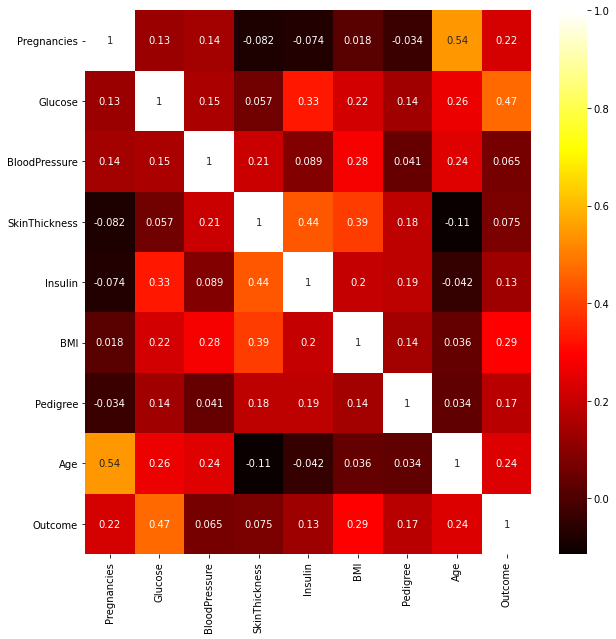

In [16]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='hot')

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


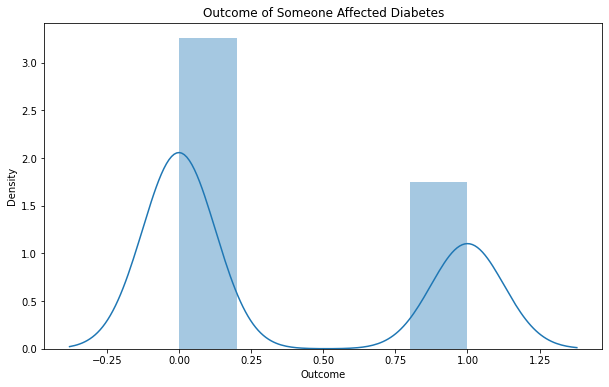

In [17]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df.Outcome)
plt.title("Outcome of Someone Affected Diabetes")
plt.show()